In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import time
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [20]:
parameters={}
parameters['starttime']="2014-03-27"
parameters['endtime']="2014-04-02"
parameters['minmagn']="0"
parameters['maxmagn']="9"
parameters['nb_events']="600"
#%% Location
parameters['minlong']="-92.00"
parameters['maxlong']="-67.00"
parameters['minlat']="-45.00"
parameters['maxlat']="-15.00"
parameters['mindepth']="0"
parameters['maxdepth']="200"

In [21]:
#%% part to grab the online data (time consuming)
# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
#feed = "http://ds.iris.edu/ieb/evtable.phtml?caller=IEB&st=1970-01-01&et=2025-01-01&ob=time-desc&li=3000&xla=-0.014&nla=-39.910&xlo=-57.656&nlo=-89.283&sbl=1&pbl=1&caller=self&name=Central%20South%20America&zm=4&mt=ter&rgn=Central%20South%20America&title=IEB%20export%3A%203000%20earthquakes%20as%20a%20sortable%20table.&stitle=from%20the%20earliest%20to%20the%20latest%20available%2C%20all%20mags%2C%20all%20depths%2C%20with%20priority%20for%20most%20recent%2C%20and%20limited%20to%203000."
feed2="https://ds.iris.edu/ieb/evtable.phtml?caller=IEB&st=" + parameters['starttime'] + "&et=" + parameters['endtime'] + "&nma=" + parameters['minmagn'] + "&xma=" + parameters['maxmagn'] + "&nde=" + parameters['mindepth'] + "&xde=" + parameters['maxdepth'] + "&ob=mag-desc&li=" + parameters['nb_events'] + "&xla=" + parameters['maxlat'] + "&nla=" + parameters['minlat'] + "&xlo=" + parameters['maxlong'] + "&nlo=" + parameters['minlong'] + "&zm=1&mt=ter&title=IEB%20export%3A%20500%20earthquakes%20as%20a%20sortable%20table.&stitle=from%202018-05-09%20to%202018-05-31%2C%20with%20magnitudes%20from%201%20to%209%2C%20depths%20from%200%20to%2060%20km%2C%20with%20priority%20for%20size%2C%20and%20limited%20to%20500."
# Reading and storage of data
tables = (pd.read_html(feed2))[0]
header=list(tables.columns.values)
tables.reset_index().values
Magn=np.array(tables[header[4]]);Lat=np.array(tables['Lat']);Long=np.array(tables['Lon']);TIME=np.array(tables['Timestamp']);Depth=np.array(tables['Depth km'])
#time24=np.array(tables['Time UTC'])

In [25]:
time1=np.linspace(np.min(TIME),np.max(TIME),500) # number of timesteps in animation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


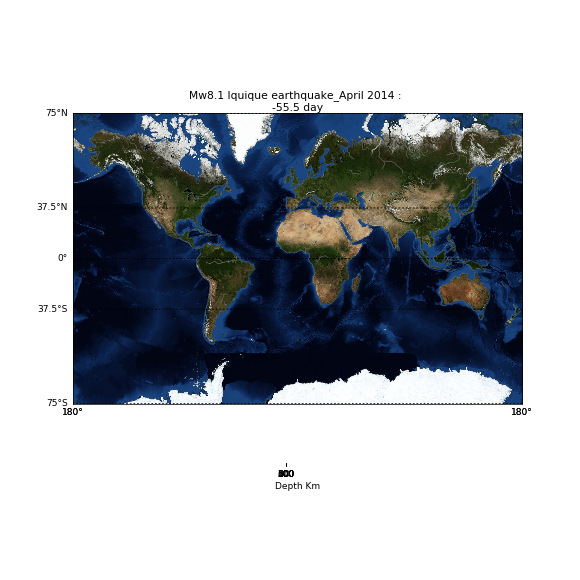

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.

In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

plt.close('all')
f1=plt.figure(1,figsize=(9,9))
ax=f1.add_subplot(111)
plt.ion()
#earth = Basemap(width=6000000,height=4500000,resolution='c',projection='merc',lat_1=10.,lat_2=35,lon_0=-70,lat_0=-20)
earth = Basemap(projection='merc',llcrnrlat=float(parameters['minlat']),urcrnrlat=float(parameters['maxlat']),\
            llcrnrlon=float(parameters['minlong']),urcrnrlon=float(parameters['maxlong']),lat_ts=20,resolution='c')
#earth = Basemap()
earth.drawcoastlines(color='0.50', linewidth=0.25)
earth.fillcontinents(color='0.95',zorder=0)
earth.drawparallels(np.linspace(float(parameters['minlat']),float(parameters['maxlat']),5),labels=[True,False,False,False])
earth.drawmeridians(np.linspace(float(parameters['minlong']),float(parameters['maxlong']),2),labels=[True,False,False,True])
ims=[]
earth.bluemarble()
i=0

dt=(np.max(TIME)-np.min(TIME))/30
#Facescolor=np.zeros((len(TIME),4));Facescolor[:,0]=1;
#Facescolor[:,1]=(Depth-np.min(Depth))/(np.max(Depth)-np.min(Depth))
Facescolor=plt.cm.jet_r(np.round((256*(Depth-np.min(Depth))/(np.max(Depth)-np.min(Depth)))).astype(int))

#
#writer = FFMpegWriter(fps=10)

#%% LEGENDS
# magnitude of earthquakes
l1 = plt.scatter([],[], s=2.7**(2),c='none', edgecolors='r')
l2 = plt.scatter([],[], s=2.7**(6),c='none', edgecolors='r')
l3 = plt.scatter([],[], s=2.7**(7),c='none', edgecolors='r')
labels = ["2", "6", "7"]
#leg = plt.legend([l1, l2, l3], labels, ncol=3, frameon=True, fontsize=12,
#handlelength=1.5, loc = 8, title='Magnitude Mw', scatterpoints = 1)
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()

# Put a legend below current axis
ax.legend([l1, l2, l3], labels,loc='upper center', bbox_to_anchor=(1.3,0.5),
          fancybox=True, shadow=True, ncol=1, title='Magnitude Mw',labelspacing=2,borderpad=1.5)


#Depth of earthquakes
norm = mpl.colors.Normalize(vmin=np.min(Depth), vmax=np.max(Depth))
#ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(norm(V)))
m = plt.cm.ScalarMappable(cmap=plt.cm.jet_r, norm=norm)
m.set_array([])

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
f1.add_axes(cax)

cbar=plt.colorbar(m, cax=cax, orientation="horizontal")
cbar.ax.set_xlabel('Depth Km')


#%% plot and movie writer
#with writer.saving(f1, "slow-slip.mp4", 100):
for i in range(len(time1)-1):
    day=(time1[i]+dt-TIME[0])/(3600*24)
#    if np.logical_and(day>24.0,day<30):
#    print(i)
    alpha=(TIME-time1[i])/dt;alpha[np.logical_or(alpha<0, alpha>1)]=0;
    Facescolor[:,-1]=alpha
    long=Long[alpha!=0]
    lat=Lat[alpha!=0]
    depth=Depth[alpha!=0]
    facescolor=Facescolor[alpha!=0]
    magn=Magn[alpha!=0]
    x,y = earth(long, lat)
    im=earth.scatter(x,y,2.7**(magn),facecolors=facescolor)
    plt.title('Mw8.1 Iquique earthquake_April 2014 : \n' + str(round(day,1)) + ' day',y=24)
    f1.canvas.draw()
    time.sleep(0.05);

# to save the figures:
    #f1.savefig("anim2\\" + '{0:04}'.format(i) + '.png')
    im.remove() 
    i=i+1


#%% and if we want to create a movie
#import imageio
#import glob,os
#images = []
#for filename in glob.glob("*.png"):
#    images.append(imageio.imread(filename))
#imageio.mimsave('movie.gif', images)
#
#for filename in glob.glob("*.png"):
#    os.remove(filename)